# WITHOUT PRE-PROCESSING

In [1]:
import numpy as np
import os

def load_and_validate_data(file_path):
    """
    Load data from a file and return it.
    Return None if data is missing.
    """
    try:
        loaded_data = np.load(file_path)
        
        ppg_f = loaded_data.get('ppg_f')
        ecg_f = loaded_data.get('ecg_f')
        seg_dbp = loaded_data.get('seg_dbp')
        seg_sbp = loaded_data.get('seg_sbp')
        
        
        if ppg_f is None or ecg_f is None or seg_dbp is None or seg_sbp is None:
            return None

        return ppg_f, ecg_f, seg_dbp, seg_sbp
    
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

def combine_data_from_folder(folder_path, batch_size=100):
    """
    Combine data from all valid files in the folder in batches.
    """
    combined_ppg = []
    combined_ecg = []
    combined_seg_dbp = []
    combined_seg_sbp = []

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        if not file_path.endswith('.npz'):
            continue
        
        data = load_and_validate_data(file_path)
        
        if data is None:
            print(f"Skipping invalid file: {file_path}")
            continue
        
        ppg_f, ecg_f, seg_dbp, seg_sbp = data
        
        combined_ppg.append(ppg_f)
        combined_ecg.append(ecg_f)
        combined_seg_dbp.append(seg_dbp)
        combined_seg_sbp.append(seg_sbp)
        
        if len(combined_ppg) >= batch_size:
            combined_ppg = np.concatenate(combined_ppg, axis=0)
            combined_ecg = np.concatenate(combined_ecg, axis=0)
            combined_seg_dbp = np.concatenate(combined_seg_dbp, axis=0)
            combined_seg_sbp = np.concatenate(combined_seg_sbp, axis=0)
            
            yield combined_ppg, combined_ecg, combined_seg_dbp, combined_seg_sbp
            
            combined_ppg = []
            combined_ecg = []
            combined_seg_dbp = []
            combined_seg_sbp = []
            

    if combined_ppg:
        combined_ppg = np.concatenate(combined_ppg, axis=0)
    else:
        combined_ppg = np.array([])
        
    if combined_ecg:
        combined_ecg = np.concatenate(combined_ecg, axis=0)
    else:
        combined_ecg = np.array([])
        
    if combined_seg_dbp:
        combined_seg_dbp = np.concatenate(combined_seg_dbp, axis=0)
    else:
        combined_seg_dbp = np.array([])
        
    if combined_seg_sbp:
        combined_seg_sbp = np.concatenate(combined_seg_sbp, axis=0)
    else:
        combined_seg_sbp = np.array([])

    yield combined_ppg, combined_ecg, combined_seg_dbp, combined_seg_sbp
train_dir = 'C:\\Users\\nihal\\Desktop\\NIHAL_IMP_DOCS\\Internship_PPG\\Train_data'
val_dir = 'C:\\Users\\nihal\\Desktop\\NIHAL_IMP_DOCS\\Internship_PPG\\Validation_data'
test_dir = 'C:\\Users\\nihal\\Desktop\\NIHAL_IMP_DOCS\\Internship_PPG\\Test_data'

In [2]:
train_data_generator = combine_data_from_folder(train_dir, batch_size=100)

In [2]:
val_data_generator = combine_data_from_folder(val_dir, batch_size=5)

In [4]:
test_data_generator = combine_data_from_folder(test_dir, batch_size=100)

In [105]:
for batch_idx, (combined_ppg_batch, combined_ecg_batch, combined_seg_dbp_batch, combined_seg_sbp_batch) in enumerate(val_data_generator):
        
    print(f"Processing Batch {batch_idx + 1}...")
    print("Batch {batch_idx + 1}",combined_ppg_batch.shape)
    

In [3]:
for batch_idx, (combined_ppg_batch, combined_ecg_batch, combined_seg_dbp_batch, combined_seg_sbp_batch) in enumerate(val_data_generator):
        
    print(f"Processing Batch {batch_idx + 1}...")
    #adjacency_matrices = generate_adjacency_matrices(combined_ppg_batch)
    ppg_batch_1=combined_ppg_batch
    sbp=combined_seg_sbp_batch
    dbp=combined_seg_dbp_batch
    print(f"Batch {batch_idx + 1} processing complete.")
    break

Processing Batch 1...
Batch 1 processing complete.


In [4]:
ppg_batch_1

array([[[0.10880738, 0.10422239, 0.10011916, ..., 0.02856525,
         0.02874503, 0.03167035]],

       [[0.19835665, 0.18781849, 0.17727147, ..., 0.32220323,
         0.30563713, 0.29009695]],

       [[0.3922964 , 0.46901012, 0.54786735, ..., 0.1911299 ,
         0.18491529, 0.17764308]],

       ...,

       [[0.72976807, 0.75930523, 0.78528627, ..., 0.16316184,
         0.14162608, 0.12519208]],

       [[0.1596165 , 0.15444425, 0.15442269, ..., 0.19686833,
         0.18912852, 0.18119911]],

       [[0.17635131, 0.16731944, 0.15807674, ..., 0.24320625,
         0.27172328, 0.30531082]]])

In [5]:
ppg=ppg_batch_1[0].flatten()
print(ppg)

[0.10880738 0.10422239 0.10011916 ... 0.02856525 0.02874503 0.03167035]


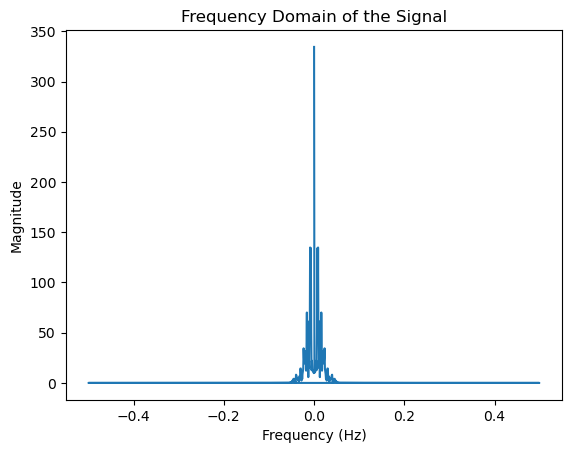

In [6]:
import numpy as np
import matplotlib.pyplot as plt


fft_signal = np.fft.fft(ppg)
freqs = np.fft.fftfreq(len(ppg))

plt.plot(freqs, np.abs(fft_signal))
plt.title('Frequency Domain of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


In [7]:
import networkx as nx
n1 = len(ppg)
G1 = nx.Graph()
G1.add_nodes_from(range(n1))
for i in range(n1):
        for j in range(i + 1, n1):
            visible = True
            for k in range(i + 1, j):
                if ppg[k] >= ppg[i] + (ppg[j] - ppg[i]) * (k - i) / (j - i):
                    visible = False
                    break
            if visible:
                G1.add_edge(i, j)

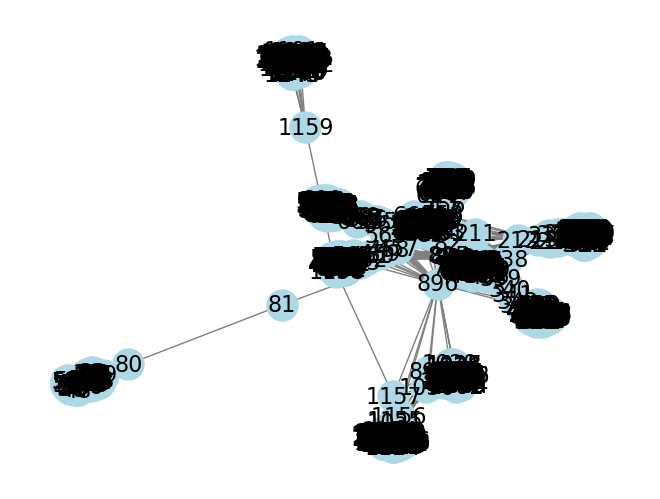

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

nx.draw(G1, with_labels=True, node_color='lightblue', node_size=500, font_size=16, edge_color='gray')


plt.show()


In [9]:
adjacency_matrix_G1=nx.adjacency_matrix(G1).todense()

In [10]:
adjacency_matrix_G1

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]], dtype=int32)

In [11]:
def create_visibility_graph(ppg_signal):
    n = len(ppg_signal)
    G = nx.Graph()
    G.add_nodes_from(range(n))

    for i in range(n):
        for j in range(i + 1, n):
            visible = True
            for k in range(i + 1, j):
                if ppg_signal[k] >= ppg_signal[i] + (ppg_signal[j] - ppg_signal[i]) * (k - i) / (j - i):
                    visible = False
                    break
            if visible:
                G.add_edge(i, j)
                
    return G

def graph_to_adjacency_matrix_image(G, size):
    adj_matrix = nx.to_numpy_array(G)
    adj_matrix_resized = zoom(adj_matrix, (size / adj_matrix.shape[0], size / adj_matrix.shape[1]), order=0)
    return adj_matrix_resized

def graph_to_flattened_adjacency_matrix(G, size):
    adj_matrix = nx.to_numpy_array(G)
    adj_matrix_resized = zoom(adj_matrix, (size / adj_matrix.shape[0], size / adj_matrix.shape[1]), order=0)
    flattened_adj = adj_matrix_resized.flatten()
    return flattened_adj[:size * size]  # Ensure it's the correct size

def generate_vg_image(ppg_signal, size):
    G = create_visibility_graph(ppg_signal)
    vg_image = graph_to_adjacency_matrix_image(G, size)
    return vg_image

def process_signal(i, ppg_signal, vg_image_size):
    """
    Generate a VG image for a given PPG signal.
    """
    print(f"Generating VG image for PPG signal {i + 1}")
    ppg_signal = ppg_signal.flatten()
    vg_image = generate_vg_image(ppg_signal, vg_image_size)
    return vg_image.flatten()

vg_image_size=224

In [12]:
ppg_batch_1.shape

(1698, 1, 1250)

In [66]:
all_vg_images_1=[]
for i,ppg1 in enumerate(ppg_batch_1):
    vg_images=process_signal(i,ppg1,vg_image_size)
    all_vg_images_1.append(np.array(vg_images))

Generating VG image for PPG signal 1
Generating VG image for PPG signal 2
Generating VG image for PPG signal 3
Generating VG image for PPG signal 4
Generating VG image for PPG signal 5
Generating VG image for PPG signal 6
Generating VG image for PPG signal 7
Generating VG image for PPG signal 8
Generating VG image for PPG signal 9
Generating VG image for PPG signal 10
Generating VG image for PPG signal 11
Generating VG image for PPG signal 12
Generating VG image for PPG signal 13
Generating VG image for PPG signal 14
Generating VG image for PPG signal 15
Generating VG image for PPG signal 16
Generating VG image for PPG signal 17
Generating VG image for PPG signal 18
Generating VG image for PPG signal 19
Generating VG image for PPG signal 20
Generating VG image for PPG signal 21
Generating VG image for PPG signal 22
Generating VG image for PPG signal 23
Generating VG image for PPG signal 24
Generating VG image for PPG signal 25
Generating VG image for PPG signal 26
Generating VG image f

Generating VG image for PPG signal 214
Generating VG image for PPG signal 215
Generating VG image for PPG signal 216
Generating VG image for PPG signal 217
Generating VG image for PPG signal 218
Generating VG image for PPG signal 219
Generating VG image for PPG signal 220
Generating VG image for PPG signal 221
Generating VG image for PPG signal 222
Generating VG image for PPG signal 223
Generating VG image for PPG signal 224
Generating VG image for PPG signal 225
Generating VG image for PPG signal 226
Generating VG image for PPG signal 227
Generating VG image for PPG signal 228
Generating VG image for PPG signal 229
Generating VG image for PPG signal 230
Generating VG image for PPG signal 231
Generating VG image for PPG signal 232
Generating VG image for PPG signal 233
Generating VG image for PPG signal 234
Generating VG image for PPG signal 235
Generating VG image for PPG signal 236
Generating VG image for PPG signal 237
Generating VG image for PPG signal 238
Generating VG image for P

Generating VG image for PPG signal 425
Generating VG image for PPG signal 426
Generating VG image for PPG signal 427
Generating VG image for PPG signal 428
Generating VG image for PPG signal 429
Generating VG image for PPG signal 430
Generating VG image for PPG signal 431
Generating VG image for PPG signal 432
Generating VG image for PPG signal 433
Generating VG image for PPG signal 434
Generating VG image for PPG signal 435
Generating VG image for PPG signal 436
Generating VG image for PPG signal 437
Generating VG image for PPG signal 438
Generating VG image for PPG signal 439
Generating VG image for PPG signal 440
Generating VG image for PPG signal 441
Generating VG image for PPG signal 442
Generating VG image for PPG signal 443
Generating VG image for PPG signal 444
Generating VG image for PPG signal 445
Generating VG image for PPG signal 446
Generating VG image for PPG signal 447
Generating VG image for PPG signal 448
Generating VG image for PPG signal 449
Generating VG image for P

Generating VG image for PPG signal 636
Generating VG image for PPG signal 637
Generating VG image for PPG signal 638
Generating VG image for PPG signal 639
Generating VG image for PPG signal 640
Generating VG image for PPG signal 641
Generating VG image for PPG signal 642
Generating VG image for PPG signal 643
Generating VG image for PPG signal 644
Generating VG image for PPG signal 645
Generating VG image for PPG signal 646
Generating VG image for PPG signal 647
Generating VG image for PPG signal 648
Generating VG image for PPG signal 649
Generating VG image for PPG signal 650
Generating VG image for PPG signal 651
Generating VG image for PPG signal 652
Generating VG image for PPG signal 653
Generating VG image for PPG signal 654
Generating VG image for PPG signal 655
Generating VG image for PPG signal 656
Generating VG image for PPG signal 657
Generating VG image for PPG signal 658
Generating VG image for PPG signal 659
Generating VG image for PPG signal 660
Generating VG image for P

Generating VG image for PPG signal 847
Generating VG image for PPG signal 848
Generating VG image for PPG signal 849
Generating VG image for PPG signal 850
Generating VG image for PPG signal 851
Generating VG image for PPG signal 852
Generating VG image for PPG signal 853
Generating VG image for PPG signal 854
Generating VG image for PPG signal 855
Generating VG image for PPG signal 856
Generating VG image for PPG signal 857
Generating VG image for PPG signal 858
Generating VG image for PPG signal 859
Generating VG image for PPG signal 860
Generating VG image for PPG signal 861
Generating VG image for PPG signal 862
Generating VG image for PPG signal 863
Generating VG image for PPG signal 864
Generating VG image for PPG signal 865
Generating VG image for PPG signal 866
Generating VG image for PPG signal 867
Generating VG image for PPG signal 868
Generating VG image for PPG signal 869
Generating VG image for PPG signal 870
Generating VG image for PPG signal 871
Generating VG image for P

Generating VG image for PPG signal 1056
Generating VG image for PPG signal 1057
Generating VG image for PPG signal 1058
Generating VG image for PPG signal 1059
Generating VG image for PPG signal 1060
Generating VG image for PPG signal 1061
Generating VG image for PPG signal 1062
Generating VG image for PPG signal 1063
Generating VG image for PPG signal 1064
Generating VG image for PPG signal 1065
Generating VG image for PPG signal 1066
Generating VG image for PPG signal 1067
Generating VG image for PPG signal 1068
Generating VG image for PPG signal 1069
Generating VG image for PPG signal 1070
Generating VG image for PPG signal 1071
Generating VG image for PPG signal 1072
Generating VG image for PPG signal 1073
Generating VG image for PPG signal 1074
Generating VG image for PPG signal 1075
Generating VG image for PPG signal 1076
Generating VG image for PPG signal 1077
Generating VG image for PPG signal 1078
Generating VG image for PPG signal 1079
Generating VG image for PPG signal 1080


Generating VG image for PPG signal 1261
Generating VG image for PPG signal 1262
Generating VG image for PPG signal 1263
Generating VG image for PPG signal 1264
Generating VG image for PPG signal 1265
Generating VG image for PPG signal 1266
Generating VG image for PPG signal 1267
Generating VG image for PPG signal 1268
Generating VG image for PPG signal 1269
Generating VG image for PPG signal 1270
Generating VG image for PPG signal 1271
Generating VG image for PPG signal 1272
Generating VG image for PPG signal 1273
Generating VG image for PPG signal 1274
Generating VG image for PPG signal 1275
Generating VG image for PPG signal 1276
Generating VG image for PPG signal 1277
Generating VG image for PPG signal 1278
Generating VG image for PPG signal 1279
Generating VG image for PPG signal 1280
Generating VG image for PPG signal 1281
Generating VG image for PPG signal 1282
Generating VG image for PPG signal 1283
Generating VG image for PPG signal 1284
Generating VG image for PPG signal 1285


Generating VG image for PPG signal 1466
Generating VG image for PPG signal 1467
Generating VG image for PPG signal 1468
Generating VG image for PPG signal 1469
Generating VG image for PPG signal 1470
Generating VG image for PPG signal 1471
Generating VG image for PPG signal 1472
Generating VG image for PPG signal 1473
Generating VG image for PPG signal 1474
Generating VG image for PPG signal 1475
Generating VG image for PPG signal 1476
Generating VG image for PPG signal 1477
Generating VG image for PPG signal 1478
Generating VG image for PPG signal 1479
Generating VG image for PPG signal 1480
Generating VG image for PPG signal 1481
Generating VG image for PPG signal 1482
Generating VG image for PPG signal 1483
Generating VG image for PPG signal 1484
Generating VG image for PPG signal 1485
Generating VG image for PPG signal 1486
Generating VG image for PPG signal 1487
Generating VG image for PPG signal 1488
Generating VG image for PPG signal 1489
Generating VG image for PPG signal 1490


Generating VG image for PPG signal 1671
Generating VG image for PPG signal 1672
Generating VG image for PPG signal 1673
Generating VG image for PPG signal 1674
Generating VG image for PPG signal 1675
Generating VG image for PPG signal 1676
Generating VG image for PPG signal 1677
Generating VG image for PPG signal 1678
Generating VG image for PPG signal 1679
Generating VG image for PPG signal 1680
Generating VG image for PPG signal 1681
Generating VG image for PPG signal 1682
Generating VG image for PPG signal 1683
Generating VG image for PPG signal 1684
Generating VG image for PPG signal 1685
Generating VG image for PPG signal 1686
Generating VG image for PPG signal 1687
Generating VG image for PPG signal 1688
Generating VG image for PPG signal 1689
Generating VG image for PPG signal 1690
Generating VG image for PPG signal 1691
Generating VG image for PPG signal 1692
Generating VG image for PPG signal 1693
Generating VG image for PPG signal 1694
Generating VG image for PPG signal 1695


Generating VG image for PPG signal 1876
Generating VG image for PPG signal 1877
Generating VG image for PPG signal 1878
Generating VG image for PPG signal 1879
Generating VG image for PPG signal 1880
Generating VG image for PPG signal 1881
Generating VG image for PPG signal 1882
Generating VG image for PPG signal 1883
Generating VG image for PPG signal 1884
Generating VG image for PPG signal 1885
Generating VG image for PPG signal 1886
Generating VG image for PPG signal 1887
Generating VG image for PPG signal 1888
Generating VG image for PPG signal 1889
Generating VG image for PPG signal 1890
Generating VG image for PPG signal 1891
Generating VG image for PPG signal 1892
Generating VG image for PPG signal 1893
Generating VG image for PPG signal 1894
Generating VG image for PPG signal 1895
Generating VG image for PPG signal 1896
Generating VG image for PPG signal 1897
Generating VG image for PPG signal 1898
Generating VG image for PPG signal 1899
Generating VG image for PPG signal 1900


Generating VG image for PPG signal 2081
Generating VG image for PPG signal 2082
Generating VG image for PPG signal 2083
Generating VG image for PPG signal 2084
Generating VG image for PPG signal 2085
Generating VG image for PPG signal 2086
Generating VG image for PPG signal 2087
Generating VG image for PPG signal 2088
Generating VG image for PPG signal 2089
Generating VG image for PPG signal 2090
Generating VG image for PPG signal 2091
Generating VG image for PPG signal 2092
Generating VG image for PPG signal 2093
Generating VG image for PPG signal 2094
Generating VG image for PPG signal 2095
Generating VG image for PPG signal 2096
Generating VG image for PPG signal 2097
Generating VG image for PPG signal 2098
Generating VG image for PPG signal 2099
Generating VG image for PPG signal 2100
Generating VG image for PPG signal 2101
Generating VG image for PPG signal 2102
Generating VG image for PPG signal 2103
Generating VG image for PPG signal 2104
Generating VG image for PPG signal 2105


Generating VG image for PPG signal 2286
Generating VG image for PPG signal 2287
Generating VG image for PPG signal 2288
Generating VG image for PPG signal 2289
Generating VG image for PPG signal 2290
Generating VG image for PPG signal 2291
Generating VG image for PPG signal 2292
Generating VG image for PPG signal 2293
Generating VG image for PPG signal 2294
Generating VG image for PPG signal 2295
Generating VG image for PPG signal 2296
Generating VG image for PPG signal 2297
Generating VG image for PPG signal 2298
Generating VG image for PPG signal 2299
Generating VG image for PPG signal 2300
Generating VG image for PPG signal 2301
Generating VG image for PPG signal 2302
Generating VG image for PPG signal 2303
Generating VG image for PPG signal 2304
Generating VG image for PPG signal 2305
Generating VG image for PPG signal 2306
Generating VG image for PPG signal 2307
Generating VG image for PPG signal 2308
Generating VG image for PPG signal 2309
Generating VG image for PPG signal 2310


Generating VG image for PPG signal 2491
Generating VG image for PPG signal 2492
Generating VG image for PPG signal 2493
Generating VG image for PPG signal 2494
Generating VG image for PPG signal 2495
Generating VG image for PPG signal 2496
Generating VG image for PPG signal 2497
Generating VG image for PPG signal 2498
Generating VG image for PPG signal 2499
Generating VG image for PPG signal 2500
Generating VG image for PPG signal 2501
Generating VG image for PPG signal 2502
Generating VG image for PPG signal 2503
Generating VG image for PPG signal 2504
Generating VG image for PPG signal 2505
Generating VG image for PPG signal 2506
Generating VG image for PPG signal 2507
Generating VG image for PPG signal 2508
Generating VG image for PPG signal 2509
Generating VG image for PPG signal 2510
Generating VG image for PPG signal 2511
Generating VG image for PPG signal 2512
Generating VG image for PPG signal 2513
Generating VG image for PPG signal 2514
Generating VG image for PPG signal 2515


Generating VG image for PPG signal 2696
Generating VG image for PPG signal 2697
Generating VG image for PPG signal 2698
Generating VG image for PPG signal 2699
Generating VG image for PPG signal 2700
Generating VG image for PPG signal 2701
Generating VG image for PPG signal 2702
Generating VG image for PPG signal 2703
Generating VG image for PPG signal 2704
Generating VG image for PPG signal 2705
Generating VG image for PPG signal 2706
Generating VG image for PPG signal 2707
Generating VG image for PPG signal 2708
Generating VG image for PPG signal 2709
Generating VG image for PPG signal 2710
Generating VG image for PPG signal 2711
Generating VG image for PPG signal 2712
Generating VG image for PPG signal 2713
Generating VG image for PPG signal 2714
Generating VG image for PPG signal 2715
Generating VG image for PPG signal 2716
Generating VG image for PPG signal 2717
Generating VG image for PPG signal 2718
Generating VG image for PPG signal 2719
Generating VG image for PPG signal 2720


Generating VG image for PPG signal 2901
Generating VG image for PPG signal 2902
Generating VG image for PPG signal 2903
Generating VG image for PPG signal 2904
Generating VG image for PPG signal 2905
Generating VG image for PPG signal 2906
Generating VG image for PPG signal 2907
Generating VG image for PPG signal 2908
Generating VG image for PPG signal 2909
Generating VG image for PPG signal 2910
Generating VG image for PPG signal 2911
Generating VG image for PPG signal 2912
Generating VG image for PPG signal 2913
Generating VG image for PPG signal 2914
Generating VG image for PPG signal 2915
Generating VG image for PPG signal 2916
Generating VG image for PPG signal 2917
Generating VG image for PPG signal 2918
Generating VG image for PPG signal 2919
Generating VG image for PPG signal 2920
Generating VG image for PPG signal 2921
Generating VG image for PPG signal 2922
Generating VG image for PPG signal 2923
Generating VG image for PPG signal 2924
Generating VG image for PPG signal 2925


Generating VG image for PPG signal 3106
Generating VG image for PPG signal 3107
Generating VG image for PPG signal 3108
Generating VG image for PPG signal 3109
Generating VG image for PPG signal 3110
Generating VG image for PPG signal 3111
Generating VG image for PPG signal 3112
Generating VG image for PPG signal 3113
Generating VG image for PPG signal 3114
Generating VG image for PPG signal 3115
Generating VG image for PPG signal 3116
Generating VG image for PPG signal 3117
Generating VG image for PPG signal 3118
Generating VG image for PPG signal 3119
Generating VG image for PPG signal 3120
Generating VG image for PPG signal 3121
Generating VG image for PPG signal 3122
Generating VG image for PPG signal 3123
Generating VG image for PPG signal 3124
Generating VG image for PPG signal 3125
Generating VG image for PPG signal 3126
Generating VG image for PPG signal 3127
Generating VG image for PPG signal 3128
Generating VG image for PPG signal 3129
Generating VG image for PPG signal 3130


In [67]:
output_dir = 'pre_vg_images_validation'
os.makedirs(output_dir, exist_ok=True)

output_file = os.path.join(output_dir, f'x_val_vg_images_batch_1.npz')
np.savez_compressed(output_file,vg_images=all_vg_images_1)

In [13]:
import os
import numpy as np
from scipy.signal import butter, filtfilt
import networkx as nx
from scipy.ndimage import zoom
import matplotlib.pyplot as pltv

In [14]:
label1=np.column_stack((sbp.flatten(),dbp.flatten()))

In [75]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.linear_model import Ridge


vg_images_normal =np.array(all_vg_images_1)

In [101]:
vg_images_normal.shape

(3273, 50176)

In [76]:
import numpy as np
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

# Define the batch size
batch_size = 32

# Function to generate image batches
def image_generator(images, labels, batch_size):
    num_samples = images.shape[0]
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_images = images[offset:offset+batch_size]
            batch_labels = labels[offset:offset+batch_size]
            batch_images_reshaped = batch_images.reshape(-1, 224, 224, 1)
            batch_images_rgb = np.concatenate([batch_images_reshaped] * 3, axis=-1)
            batch_images_preprocessed = preprocess_input(batch_images_rgb)
            yield batch_images_preprocessed, batch_labels

In [77]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense


base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = Flatten(name='flatten')(x)
#x = Dense(4096, activation='relu', name='fc1')(x)
#x = Dense(4096, activation='relu', name='fc2')(x)
output = Dense(512, activation='linear',name='fc1')(x)  

model = Model(inputs=base_model.input, outputs=output)


model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [78]:
images = vg_images_normal
labels = label1
num_samples = images.shape[0]

In [79]:
# Define a new model to extract features from the 'fc1' layer of the trained model
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('fc1').output)

# Function to extract features
def extract_features(generator, num_samples):
    features = []
    for batch_images, _ in generator:
        batch_features = feature_extractor.predict(batch_images)
        features.append(batch_features)
        if len(features) * batch_size >= num_samples:
            break
    return np.vstack(features)

feature_generator_normal = image_generator(images, np.zeros((num_samples,)), batch_size)


features_normal = extract_features(feature_generator_normal, num_samples)


features_normal_flattened= features_normal.reshape(features_normal.shape[0],-1)


features= features_normal_flattened

1/1 [==============================] - 3s 3s/step


In [81]:
from sklearn.model_selection import train_test_split

vg_features_train,vg_features_test,label_vgg_train,label_vgg_test=train_test_split(features,labels, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(vg_features_train, label_vgg_train)


predicted_values_split = ridge_model.predict(vg_features_test)

In [82]:
predicted_sbp =predicted_values_split[:, 0]  
predicted_dbp =predicted_values_split[:, 1]  

true_sbp = label_vgg_test[:, 0]  
true_dbp = label_vgg_test[:, 1]  

def calculate_metrics(predicted, true):
   
    R = np.corrcoef(predicted, true)[0, 1]

    
    MAE = np.mean(np.abs(predicted - true))

    
    RMSE = np.sqrt(np.mean((predicted - true) ** 2))

    
    ME = np.mean(predicted - true)
    SD = np.std(predicted - true)

    return R, MAE, RMSE, (ME, SD)


sbp_metrics = calculate_metrics(predicted_sbp, true_sbp)
print(f"SBP Metrics: R={sbp_metrics[0]}, MAE={sbp_metrics[1]}, RMSE={sbp_metrics[2]}, ME±SD={sbp_metrics[3]}")


dbp_metrics = calculate_metrics(predicted_dbp, true_dbp)
print(f"DBP Metrics: R={dbp_metrics[0]}, MAE={dbp_metrics[1]}, RMSE={dbp_metrics[2]}, ME±SD={dbp_metrics[3]}")

SBP Metrics: R=0.8618413982626751, MAE=7.352253030127733, RMSE=9.440532124539649, ME±SD=(-0.04019348335466824, 9.440446561384737)
DBP Metrics: R=0.8365819253808153, MAE=3.8626238968621927, RMSE=5.244422429877142, ME±SD=(0.037305180114918964, 5.244289746622994)


In [15]:
import numpy as np
from scipy.signal import find_peaks

def select_n_peak_window(ppg_signal, n_peaks=3):

    peaks, _ = find_peaks(ppg_signal, distance=50)  
    
    
    if len(peaks) < n_peaks:
        raise ValueError(f"Not enough peaks detected. Detected peaks: {len(peaks)}")
    
    
    start_index = peaks[0]
    end_index = peaks[n_peaks - 1]  
    
    
    ppg_window = ppg_signal[start_index:end_index + 1]
    
    return ppg_window, start_index, end_index

ppg_3_peak = []
for ppg1 in ppg_batch_1:
    ppg_window_1, start_idx, end_idx = select_n_peak_window(ppg1.flatten())
    ppg_3_peak.append(ppg_window_1)




In [16]:
ppg_batch_1.shape

(1698, 1, 1250)

In [17]:
ppg_3_peak

[array([0.99796443, 0.99113249, 0.97833601, 0.96055166, 0.93871247,
        0.91379038, 0.88666497, 0.85803013, 0.82852198, 0.79852261,
        0.76828786, 0.73797972, 0.707548  , 0.67694275, 0.64602841,
        0.61470245, 0.5828702 , 0.55048206, 0.51760369, 0.48435757,
        0.45101243, 0.41785953, 0.3852713 , 0.353704  , 0.32356046,
        0.29524563, 0.26917171, 0.24557064, 0.22461734, 0.2064434 ,
        0.19098398, 0.17812546, 0.16762774, 0.15918091, 0.15247907,
        0.14707233, 0.14257484, 0.1386709 , 0.1349247 , 0.13109931,
        0.12700435, 0.12244309, 0.11741697, 0.11183247, 0.10582111,
        0.09953973, 0.09298565, 0.08639807, 0.07992846, 0.07369039,
        0.06782624, 0.06237838, 0.05745628, 0.05303893, 0.04913003,
        0.04570253, 0.0426269 , 0.03992409, 0.03743657, 0.0350782 ,
        0.03286644, 0.03063101, 0.02840321, 0.02618562, 0.02390979,
        0.02165825, 0.01947117, 0.01736211, 0.01539751, 0.01370447,
        0.01226435, 0.01114015, 0.01042766, 0.01

In [18]:
ppg_3_peak[0].shape

(257,)

In [19]:
ppg_batch_1[0].shape

(1, 1250)

In [20]:
ppg_batch_1.flatten().shape

(2122500,)

In [21]:
ppg_3_peak_reshaped = []

for ppg_window in ppg_3_peak:
    reshaped_window = ppg_window.reshape(1, -1)  # Reshape to (1, N)
    ppg_3_peak_reshaped.append(reshaped_window)

In [22]:
ppg_3_peak_reshaped[2].shape

(1, 169)

In [23]:
import networkx as nx
ppg=ppg_3_peak_reshaped[2].flatten()
n1 = len(ppg)
G1 = nx.Graph()
G1.add_nodes_from(range(n1))
for i in range(n1):
        for j in range(i + 1, n1):
            visible = True
            for k in range(i + 1, j):
                if ppg[k] >= ppg[i] + (ppg[j] - ppg[i]) * (k - i) / (j - i):
                    visible = False
                    break
            if visible:
                G1.add_edge(i, j)

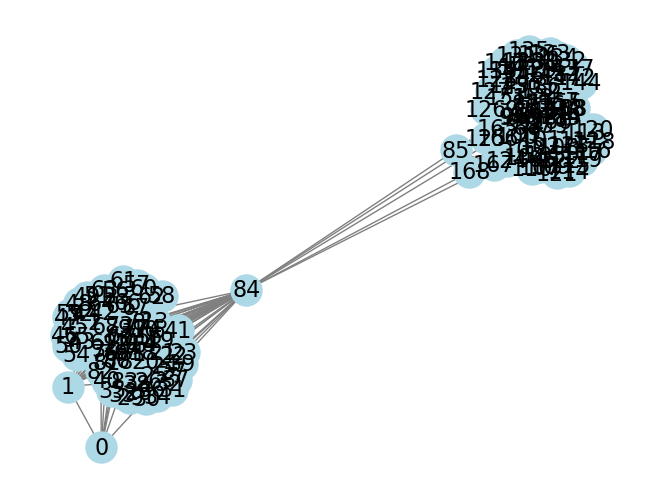

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

nx.draw(G1, with_labels=True, node_color='lightblue', node_size=500, font_size=16, edge_color='gray')


plt.show()


In [13]:
def plot_vg_images(vg_images, num_images=5, image_size=(224, 224)):
    for i in range(min(num_images, vg_images.shape[0])):
        plt.figure(figsize=(5, 5))
        # Reshape each VG image to its original 2D shape
        img = vg_images[i].reshape(image_size)
        plt.imshow(img)
        plt.title(f'VG Image {i+1}')
        plt.axis('off')
        plt.show()

In [27]:
all_vg_images_3peak=[]
for i,ppg1 in enumerate(ppg_3_peak_reshaped):
    vg_images=process_signal(i,ppg1,vg_image_size)
    all_vg_images_3peak.append(np.array(vg_images))

Generating VG image for PPG signal 1
Generating VG image for PPG signal 2
Generating VG image for PPG signal 3
Generating VG image for PPG signal 4
Generating VG image for PPG signal 5
Generating VG image for PPG signal 6
Generating VG image for PPG signal 7
Generating VG image for PPG signal 8
Generating VG image for PPG signal 9
Generating VG image for PPG signal 10
Generating VG image for PPG signal 11
Generating VG image for PPG signal 12
Generating VG image for PPG signal 13
Generating VG image for PPG signal 14
Generating VG image for PPG signal 15
Generating VG image for PPG signal 16
Generating VG image for PPG signal 17
Generating VG image for PPG signal 18
Generating VG image for PPG signal 19
Generating VG image for PPG signal 20
Generating VG image for PPG signal 21
Generating VG image for PPG signal 22
Generating VG image for PPG signal 23
Generating VG image for PPG signal 24
Generating VG image for PPG signal 25
Generating VG image for PPG signal 26
Generating VG image f

Generating VG image for PPG signal 214
Generating VG image for PPG signal 215
Generating VG image for PPG signal 216
Generating VG image for PPG signal 217
Generating VG image for PPG signal 218
Generating VG image for PPG signal 219
Generating VG image for PPG signal 220
Generating VG image for PPG signal 221
Generating VG image for PPG signal 222
Generating VG image for PPG signal 223
Generating VG image for PPG signal 224
Generating VG image for PPG signal 225
Generating VG image for PPG signal 226
Generating VG image for PPG signal 227
Generating VG image for PPG signal 228
Generating VG image for PPG signal 229
Generating VG image for PPG signal 230
Generating VG image for PPG signal 231
Generating VG image for PPG signal 232
Generating VG image for PPG signal 233
Generating VG image for PPG signal 234
Generating VG image for PPG signal 235
Generating VG image for PPG signal 236
Generating VG image for PPG signal 237
Generating VG image for PPG signal 238
Generating VG image for P

Generating VG image for PPG signal 425
Generating VG image for PPG signal 426
Generating VG image for PPG signal 427
Generating VG image for PPG signal 428
Generating VG image for PPG signal 429
Generating VG image for PPG signal 430
Generating VG image for PPG signal 431
Generating VG image for PPG signal 432
Generating VG image for PPG signal 433
Generating VG image for PPG signal 434
Generating VG image for PPG signal 435
Generating VG image for PPG signal 436
Generating VG image for PPG signal 437
Generating VG image for PPG signal 438
Generating VG image for PPG signal 439
Generating VG image for PPG signal 440
Generating VG image for PPG signal 441
Generating VG image for PPG signal 442
Generating VG image for PPG signal 443
Generating VG image for PPG signal 444
Generating VG image for PPG signal 445
Generating VG image for PPG signal 446
Generating VG image for PPG signal 447
Generating VG image for PPG signal 448
Generating VG image for PPG signal 449
Generating VG image for P

Generating VG image for PPG signal 636
Generating VG image for PPG signal 637
Generating VG image for PPG signal 638
Generating VG image for PPG signal 639
Generating VG image for PPG signal 640
Generating VG image for PPG signal 641
Generating VG image for PPG signal 642
Generating VG image for PPG signal 643
Generating VG image for PPG signal 644
Generating VG image for PPG signal 645
Generating VG image for PPG signal 646
Generating VG image for PPG signal 647
Generating VG image for PPG signal 648
Generating VG image for PPG signal 649
Generating VG image for PPG signal 650
Generating VG image for PPG signal 651
Generating VG image for PPG signal 652
Generating VG image for PPG signal 653
Generating VG image for PPG signal 654
Generating VG image for PPG signal 655
Generating VG image for PPG signal 656
Generating VG image for PPG signal 657
Generating VG image for PPG signal 658
Generating VG image for PPG signal 659
Generating VG image for PPG signal 660
Generating VG image for P

Generating VG image for PPG signal 847
Generating VG image for PPG signal 848
Generating VG image for PPG signal 849
Generating VG image for PPG signal 850
Generating VG image for PPG signal 851
Generating VG image for PPG signal 852
Generating VG image for PPG signal 853
Generating VG image for PPG signal 854
Generating VG image for PPG signal 855
Generating VG image for PPG signal 856
Generating VG image for PPG signal 857
Generating VG image for PPG signal 858
Generating VG image for PPG signal 859
Generating VG image for PPG signal 860
Generating VG image for PPG signal 861
Generating VG image for PPG signal 862
Generating VG image for PPG signal 863
Generating VG image for PPG signal 864
Generating VG image for PPG signal 865
Generating VG image for PPG signal 866
Generating VG image for PPG signal 867
Generating VG image for PPG signal 868
Generating VG image for PPG signal 869
Generating VG image for PPG signal 870
Generating VG image for PPG signal 871
Generating VG image for P

Generating VG image for PPG signal 1056
Generating VG image for PPG signal 1057
Generating VG image for PPG signal 1058
Generating VG image for PPG signal 1059
Generating VG image for PPG signal 1060
Generating VG image for PPG signal 1061
Generating VG image for PPG signal 1062
Generating VG image for PPG signal 1063
Generating VG image for PPG signal 1064
Generating VG image for PPG signal 1065
Generating VG image for PPG signal 1066
Generating VG image for PPG signal 1067
Generating VG image for PPG signal 1068
Generating VG image for PPG signal 1069
Generating VG image for PPG signal 1070
Generating VG image for PPG signal 1071
Generating VG image for PPG signal 1072
Generating VG image for PPG signal 1073
Generating VG image for PPG signal 1074
Generating VG image for PPG signal 1075
Generating VG image for PPG signal 1076
Generating VG image for PPG signal 1077
Generating VG image for PPG signal 1078
Generating VG image for PPG signal 1079
Generating VG image for PPG signal 1080


Generating VG image for PPG signal 1261
Generating VG image for PPG signal 1262
Generating VG image for PPG signal 1263
Generating VG image for PPG signal 1264
Generating VG image for PPG signal 1265
Generating VG image for PPG signal 1266
Generating VG image for PPG signal 1267
Generating VG image for PPG signal 1268
Generating VG image for PPG signal 1269
Generating VG image for PPG signal 1270
Generating VG image for PPG signal 1271
Generating VG image for PPG signal 1272
Generating VG image for PPG signal 1273
Generating VG image for PPG signal 1274
Generating VG image for PPG signal 1275
Generating VG image for PPG signal 1276
Generating VG image for PPG signal 1277
Generating VG image for PPG signal 1278
Generating VG image for PPG signal 1279
Generating VG image for PPG signal 1280
Generating VG image for PPG signal 1281
Generating VG image for PPG signal 1282
Generating VG image for PPG signal 1283
Generating VG image for PPG signal 1284
Generating VG image for PPG signal 1285


Generating VG image for PPG signal 1466
Generating VG image for PPG signal 1467
Generating VG image for PPG signal 1468
Generating VG image for PPG signal 1469
Generating VG image for PPG signal 1470
Generating VG image for PPG signal 1471
Generating VG image for PPG signal 1472
Generating VG image for PPG signal 1473
Generating VG image for PPG signal 1474
Generating VG image for PPG signal 1475
Generating VG image for PPG signal 1476
Generating VG image for PPG signal 1477
Generating VG image for PPG signal 1478
Generating VG image for PPG signal 1479
Generating VG image for PPG signal 1480
Generating VG image for PPG signal 1481
Generating VG image for PPG signal 1482
Generating VG image for PPG signal 1483
Generating VG image for PPG signal 1484
Generating VG image for PPG signal 1485
Generating VG image for PPG signal 1486
Generating VG image for PPG signal 1487
Generating VG image for PPG signal 1488
Generating VG image for PPG signal 1489
Generating VG image for PPG signal 1490


Generating VG image for PPG signal 1671
Generating VG image for PPG signal 1672
Generating VG image for PPG signal 1673
Generating VG image for PPG signal 1674
Generating VG image for PPG signal 1675
Generating VG image for PPG signal 1676
Generating VG image for PPG signal 1677
Generating VG image for PPG signal 1678
Generating VG image for PPG signal 1679
Generating VG image for PPG signal 1680
Generating VG image for PPG signal 1681
Generating VG image for PPG signal 1682
Generating VG image for PPG signal 1683
Generating VG image for PPG signal 1684
Generating VG image for PPG signal 1685
Generating VG image for PPG signal 1686
Generating VG image for PPG signal 1687
Generating VG image for PPG signal 1688
Generating VG image for PPG signal 1689
Generating VG image for PPG signal 1690
Generating VG image for PPG signal 1691
Generating VG image for PPG signal 1692
Generating VG image for PPG signal 1693
Generating VG image for PPG signal 1694
Generating VG image for PPG signal 1695


In [29]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.linear_model import Ridge


vg_images_normal =np.array(all_vg_images_3peak)

In [30]:
import numpy as np
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical


batch_size = 32


def image_generator(images, labels, batch_size):
    num_samples = images.shape[0]
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_images = images[offset:offset+batch_size]
            batch_labels = labels[offset:offset+batch_size]
            batch_images_reshaped = batch_images.reshape(-1, 224, 224, 1)
            batch_images_rgb = np.concatenate([batch_images_reshaped] * 3, axis=-1)
            batch_images_preprocessed = preprocess_input(batch_images_rgb)
            yield batch_images_preprocessed, batch_labels

In [31]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense


base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten(name='flatten')(x)
#x = Dense(4096, activation='relu', name='fc1')(x)
#x = Dense(4096, activation='relu', name='fc2')(x)
output = Dense(512, activation='linear',name='fc1')(x)  

model = Model(inputs=base_model.input, outputs=output)


model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [32]:
label1=np.column_stack((sbp.flatten(),dbp.flatten()))

In [33]:
images = vg_images_normal
labels = label1
num_samples = images.shape[0]

In [35]:
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('fc1').output)


def extract_features(generator, num_samples):
    features = []
    for batch_images, _ in generator:
        batch_features = feature_extractor.predict(batch_images)
        features.append(batch_features)
        if len(features) * batch_size >= num_samples:
            break
    return np.vstack(features)

feature_generator_normal = image_generator(images, np.zeros((num_samples,)), batch_size)


features_normal = extract_features(feature_generator_normal, num_samples)


features_normal_flattened= features_normal.reshape(features_normal.shape[0],-1)


features= features_normal_flattened

1/1 [==============================] - 1s 918ms/step


In [36]:
from sklearn.model_selection import train_test_split

vg_features_train,vg_features_test,label_vgg_train,label_vgg_test=train_test_split(features,labels, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(vg_features_train, label_vgg_train)


predicted_values_split = ridge_model.predict(vg_features_test)

In [37]:
predicted_sbp =predicted_values_split[:, 0]  
predicted_dbp =predicted_values_split[:, 1]  

true_sbp = label_vgg_test[:, 0]  
true_dbp = label_vgg_test[:, 1]  

def calculate_metrics(predicted, true):
    
    R = np.corrcoef(predicted, true)[0, 1]

   
    MAE = np.mean(np.abs(predicted - true))

    
    RMSE = np.sqrt(np.mean((predicted - true) ** 2))

    
    ME = np.mean(predicted - true)
    SD = np.std(predicted - true)

    return R, MAE, RMSE, (ME, SD)


sbp_metrics = calculate_metrics(predicted_sbp, true_sbp)
print(f"SBP Metrics: R={sbp_metrics[0]}, MAE={sbp_metrics[1]}, RMSE={sbp_metrics[2]}, ME±SD={sbp_metrics[3]}")


dbp_metrics = calculate_metrics(predicted_dbp, true_dbp)
print(f"DBP Metrics: R={dbp_metrics[0]}, MAE={dbp_metrics[1]}, RMSE={dbp_metrics[2]}, ME±SD={dbp_metrics[3]}")

SBP Metrics: R=0.6589602608005299, MAE=10.002329640619134, RMSE=13.41948997439463, ME±SD=(-0.36311633147103106, 13.41457631469205)
DBP Metrics: R=0.6095953369272242, MAE=4.073078611093133, RMSE=5.40408530663727, ME±SD=(-0.058533409201296606, 5.403768300123545)


In [41]:
all_vg_images_3peak

[array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 1., ..., 1., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 1., ..., 1., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 

In [45]:
vg_images_normal.shape

(1698, 50176)

# VG Image generation for validation data

In [41]:
import os
import numpy as np
from scipy.signal import butter, filtfilt
import networkx as nx
from scipy.ndimage import zoom
import matplotlib.pyplot as plt

def load_and_validate_data(file_path):
    """
    Load data from a file and validate its presence.
    Return None if data is invalid or shapes are inconsistent.
    """
    try:
        loaded_data = np.load(file_path)
        
        # Extract data
        ppg_f = loaded_data.get('ppg_f')
        ecg_f = loaded_data.get('ecg_f')
        seg_dbp = loaded_data.get('seg_dbp')
        seg_sbp = loaded_data.get('seg_sbp')
        
        # Check if all required data is present and non-null
        if ppg_f is None or ecg_f is None or seg_dbp is None or seg_sbp is None:
            return None
        
        # Check for empty data
        if ppg_f.size == 0 or ecg_f.size == 0 or seg_dbp.size == 0 or seg_sbp.size == 0:
            return None

        return ppg_f, ecg_f, seg_dbp, seg_sbp
    
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    """
    Apply a bandpass filter to the data.
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def preprocess_signal(signal, fs):
    """
    Preprocess the signal by bandpass filtering and normalization.
    """
    filtered_signal = bandpass_filter(signal, 0.5, 40, fs)
    normalized_signal = (filtered_signal - np.mean(filtered_signal)) / np.std(filtered_signal)
    return normalized_signal

def create_visibility_graph(ppg_signal):
    n = len(ppg_signal)
    G = nx.Graph()
    G.add_nodes_from(range(n))

    for i in range(n):
        for j in range(i + 1, n):
            visible = True
            for k in range(i + 1, j):
                if ppg_signal[k] >= ppg_signal[i] + (ppg_signal[j] - ppg_signal[i]) * (k - i) / (j - i):
                    visible = False
                    break
            if visible:
                G.add_edge(i, j)
                
    return G

def graph_to_adjacency_matrix_GCN(G):
    return nx.adjacency_matrix(G).todense()

def generate_adjacency_matrices(ppg_signals):
    adjacency_matrices = []
    for ppg_signal in ppg_signals:
        G = create_visibility_graph(ppg_signal)
        adjacency_matrix = graph_to_adjacency_matrix(G)
        adjacency_matrices.append(adjacency_matrix)
    return adjacency_matrices

def graph_to_adjacency_matrix_image(G, size):
    adj_matrix = nx.to_numpy_array(G)
    adj_matrix_resized = zoom(adj_matrix, (size / adj_matrix.shape[0], size / adj_matrix.shape[1]), order=0)
    return adj_matrix_resized

def graph_to_flattened_adjacency_matrix(G, size):
    adj_matrix = nx.to_numpy_array(G)
    adj_matrix_resized = zoom(adj_matrix, (size / adj_matrix.shape[0], size / adj_matrix.shape[1]), order=0)
    flattened_adj = adj_matrix_resized.flatten()
    return flattened_adj[:size * size]  # Ensure it's the correct size

def generate_vg_image(ppg_signal, size):
    G = create_visibility_graph(ppg_signal)
    vg_image = graph_to_adjacency_matrix_image(G, size)
    return vg_image

def plot_vg_images(vg_images, num_images=5, image_size=(224, 224)):
    for i in range(min(num_images, vg_images.shape[0])):
        plt.figure(figsize=(5, 5))
        # Reshape each VG image to its original 2D shape
        img = vg_images[i].reshape(image_size)
        plt.imshow(img)
        plt.title(f'VG Image {i+1}')
        plt.axis('off')
        plt.show()
    
def combine_data_from_folder(folder_path , batch_size=500):
    """
    Combine and preprocess data from all valid files in the folder and generate VG images.
    """
    combined_ppg = []
    combined_ecg = []
    combined_seg_dbp = []
    combined_seg_sbp = []

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        if not file_path.endswith('.npz'):
            continue
        
        data = load_and_validate_data(file_path)
        
        if data is None:
            print(f"Skipping invalid file: {file_path}")
            continue
        
        ppg_f, ecg_f, seg_dbp, seg_sbp = data
        
        if ppg_f.ndim == 3:
            for i in range(ppg_f.shape[0]):
                preprocessed_ppg = preprocess_signal(ppg_f[i], 1000)
                combined_ppg.append(preprocessed_ppg)
        else:
            print(f"Skipping PPG data with unexpected shape: {ppg_f.shape}")
        
        if ecg_f.ndim == 3:
            for i in range(ecg_f.shape[0]):
                preprocessed_ecg = preprocess_signal(ecg_f[i], 1000)
                combined_ecg.append(preprocessed_ecg)
        else:
            print(f"Skipping ECG data with unexpected shape: {ecg_f.shape}")
        
        if seg_dbp.ndim == 2:
            combined_seg_dbp.append(seg_dbp)
        else:
            print(f"Skipping SegDBP data with unexpected shape: {seg_dbp.shape}")
        
        if seg_sbp.ndim == 2:
            combined_seg_sbp.append(seg_sbp)
        else:
            print(f"Skipping SegSBP data with unexpected shape: {seg_sbp.shape}")
        
        if len(combined_ppg) >= batch_size:
            combined_ppg = np.stack(combined_ppg, axis=0)
            combined_ecg = np.stack(combined_ecg, axis=0)
            combined_seg_dbp = np.concatenate(combined_seg_dbp, axis=0)
            combined_seg_sbp = np.concatenate(combined_seg_sbp, axis=0)
            
            yield combined_ppg, combined_ecg, combined_seg_dbp, combined_seg_sbp
            
            combined_ppg = []
            combined_ecg = []
            combined_seg_dbp = []
            combined_seg_sbp = []
            

    if combined_ppg:
        combined_ppg = np.stack(combined_ppg, axis=0)
    else:
        combined_ppg = np.array([])
        
    if combined_ecg:
        combined_ecg = np.stack(combined_ecg, axis=0)
    else:
        combined_ecg = np.array([])
        
    if combined_seg_dbp:
        combined_seg_dbp = np.concatenate(combined_seg_dbp, axis=0)
    else:
        combined_seg_dbp = np.array([])
        
    if combined_seg_sbp:
        combined_seg_sbp = np.concatenate(combined_seg_sbp, axis=0)
    else:
        combined_seg_sbp = np.array([])

    yield combined_ppg, combined_ecg, combined_seg_dbp, combined_seg_sbp
    
def invert_images(vg_images):
    
    inverted_images = [255 - image for image in vg_images]
    return inverted_images


folder_path = r'C:\Users\nihal\Desktop\NIHAL_IMP_DOCS\Internship_PPG\Validation_data'
vg_image_size = 224  

val_data_generator = combine_data_from_folder(folder_path, 500)

In [1]:
import numpy as np
import os
from concurrent.futures import ThreadPoolExecutor


output_dir = 'vg_images_validation'
os.makedirs(output_dir, exist_ok=True)

def process_signal(i, ppg_signal, vg_image_size):
    """
    Generate a VG image for a given PPG signal.
    """
    print(f"Generating VG image for PPG signal {i + 1}")
    ppg_signal = ppg_signal.flatten()
    vg_image = generate_vg_image(ppg_signal, vg_image_size)
    return vg_image.flatten()

for batch_idx, (combined_ppg_batch, combined_ecg_batch, combined_seg_dbp_batch, combined_seg_sbp_batch) in enumerate(val_data_generator):
    
    output_file = os.path.join(output_dir, f'val_vg_images_batch_{batch_idx + 1}.npz')
    if os.path.exists(output_file):
        print(f"Batch {batch_idx + 1} already processed. Skipping...")
        continue
        
    print(f"Processing Batch {batch_idx + 1}...")

    with ThreadPoolExecutor() as executor:
        
        vg_images = list(executor.map(process_signal, range(len(combined_ppg_batch)), combined_ppg_batch, [vg_image_size]*len(combined_ppg_batch)))
        
    
    np.savez_compressed(output_file, vg_images=vg_images)
    print(f"Batch {batch_idx + 1} processing complete.")


NameError: name 'val_data_generator' is not defined

# Feature extraction using tsne and pca

In [87]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os

vg_image_dir = 'vg_images_validation'


def load_vg_images(batch_idx):
    vg_images_path = os.path.join(vg_image_dir, f'val_vg_images_batch_{batch_idx}.npz')
    
    if not os.path.exists(vg_images_path) :
        print(f"VG image files do not exist for Batch {batch_idx}.")
        return None
    
    vg_images = np.load(vg_images_path)['vg_images']

    
    return vg_images

def plot_vg_images(vg_images, num_images=5, image_size=(224, 224)):
    for i in range(min(num_images, vg_images.shape[0])):
        plt.figure(figsize=(5, 5))
        # Reshape each VG image to its original 2D shape
        img = vg_images[i].reshape(image_size)
        plt.imshow(img)
        plt.title(f'VG Image {i+1}')
        plt.axis('off')
        plt.show()


In [88]:

all_vg_images = []
all_sbp_values = []
all_dbp_values = []


for batch_idx, (combined_ppg_batch, combined_ecg_batch, combined_seg_dbp_batch, combined_seg_sbp_batch) in enumerate(val_data_generator):
    print(f"Processing Batch {batch_idx + 1}...")

    
    vg_images = load_vg_images(batch_idx + 1)
    if vg_images is None:
        print(f"No VG images found for Batch {batch_idx + 1}. Stopping...")
        break
    
    flattened_vg_images = np.array(vg_images)
    
    all_vg_images.append(flattened_vg_images)
    all_sbp_values.append(combined_seg_sbp_batch.flatten())
    all_dbp_values.append(combined_seg_dbp_batch.flatten())

    print(f"Batch {batch_idx + 1} processing complete.")

    

all_vg_images = np.concatenate(all_vg_images, axis=0)
all_sbp_values = np.concatenate(all_sbp_values, axis=0)
all_dbp_values = np.concatenate(all_dbp_values, axis=0)     

Processing Batch 1...
Batch 1 processing complete.
Processing Batch 2...
Batch 2 processing complete.
Processing Batch 3...
Batch 3 processing complete.
Processing Batch 4...
Batch 4 processing complete.
Processing Batch 5...
VG image files do not exist for Batch 5.
No VG images found for Batch 5. Stopping...


In [89]:
all_vg_images

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [44]:
y = np.column_stack((all_sbp_values, all_dbp_values))

In [20]:
print("Applying PCA...")
    
pca = PCA(n_components=3)
X_pca = pca.fit_transform(all_vg_images)

print("Applying t-SNE...")
    
tsne = TSNE(n_components=3, perplexity=30)
X_tsne = tsne.fit_transform(X_pca)

Applying PCA...
Applying t-SNE...


In [21]:
X_pca

array([[ 12.93696786,   2.87310331, -10.6515877 ],
       [  0.10459152,   0.09095461,  -0.48290581],
       [ -0.14089793,   0.13222006,   0.71328674],
       ...,
       [ -9.13414574,  -0.90383027,   0.53424266],
       [ -8.79853079,  -0.40163124,   0.30285203],
       [ -5.9342701 ,   0.17446008,   0.57654918]])

In [22]:
from sklearn.model_selection import train_test_split

vg_train,vg_test,label_train,label_test=train_test_split(X_tsne,y, test_size=0.5, random_state=42)

In [11]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=0.1)

ridge_model.fit(vg_train,label_train)

PREDICTED=ridge_model.predict(vg_test)


In [12]:
print(label_test)

[[116.87851729  53.3878762 ]
 [123.9255999   62.57847785]
 [109.35969776  56.93946107]
 ...
 [ 99.69974196  46.29220253]
 [111.72061077  52.43489214]
 [124.39488092  54.87478375]]


In [13]:
print(PREDICTED)

[[115.37728   57.744366]
 [117.26421   59.15437 ]
 [107.8452    54.998943]
 ...
 [107.83547   55.386124]
 [114.74475   58.119816]
 [113.04427   56.58636 ]]


In [14]:
predicted_sbp = PREDICTED[:, 0]  # Assuming the first column is SBP
predicted_dbp = PREDICTED[:, 1]  # Assuming the second column is DBP

true_sbp = label_test[:, 0]  # True SBP values from q
true_dbp = label_test[:, 1]  # True DBP values from q

def calculate_metrics(predicted, true):
    # Calculate R (correlation coefficient)
    R = np.corrcoef(predicted, true)[0, 1]

    # Calculate MAE (Mean Absolute Error)
    MAE = np.mean(np.abs(predicted - true))

    # Calculate RMSE (Root Mean Squared Error)
    RMSE = np.sqrt(np.mean((predicted - true) ** 2))

    # Calculate ME ± SD (Mean Error ± Standard Deviation)
    ME = np.mean(predicted - true)
    SD = np.std(predicted - true)

    return R, MAE, RMSE, (ME, SD)

# Calculate metrics for SBP
sbp_metrics = calculate_metrics(predicted_sbp, true_sbp)
print(f"SBP Metrics: R={sbp_metrics[0]}, MAE={sbp_metrics[1]}, RMSE={sbp_metrics[2]}, ME±SD={sbp_metrics[3]}")

# Calculate metrics for DBP
dbp_metrics = calculate_metrics(predicted_dbp, true_dbp)
print(f"DBP Metrics: R={dbp_metrics[0]}, MAE={dbp_metrics[1]}, RMSE={dbp_metrics[2]}, ME±SD={dbp_metrics[3]}")

SBP Metrics: R=0.12237005207518194, MAE=14.953249804682239, RMSE=18.83423928442876, ME±SD=(0.5861659891995461, 18.825115639916408)
DBP Metrics: R=0.15614869299838482, MAE=5.520343755733123, RMSE=7.294377115615571, ME±SD=(0.31663311799273475, 7.287501696288402)


In [15]:
n_features = flattened_vg_images.shape[1]
n_samples = flattened_vg_images.shape[0]
pca_components=3
tsne_components=3
pca_params=pca_components * n_features
tsne_params = n_samples * tsne_components

In [16]:
print('pca_params',pca_params)
print('tsne_params',tsne_params)
print('total_params',pca_params+tsne_params)

pca_params 150528
tsne_params 5994
total_params 156522


In [17]:
n_features

50176

In [18]:
n_samples

1998

# VGG19 Feature extraction

In [45]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.linear_model import Ridge


vg_images_normal = all_vg_images

In [67]:
import numpy as np
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

# Define the batch size
batch_size = 32

# Function to generate image batches
def image_generator(images, labels, batch_size):
    num_samples = images.shape[0]
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_images = images[offset:offset+batch_size]
            batch_labels = labels[offset:offset+batch_size]
            batch_images_reshaped = batch_images.reshape(-1, 224, 224, 1)
            batch_images_rgb = np.concatenate([batch_images_reshaped] * 3, axis=-1)
            batch_images_preprocessed = preprocess_input(batch_images_rgb)
            yield batch_images_preprocessed, batch_labels

In [121]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense

# Load the VGG19 model with pre-trained ImageNet weights and without the top layer
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
#for layer in base_model.layers:
    #layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten(name='flatten')(x)
#x = Dense(4096, activation='relu', name='fc1')(x)
#x = Dense(4096, activation='relu', name='fc2')(x)
output = Dense(512, activation='linear',name='fc1')(x)  # Adjust the output layer according to your task

# Create a new model with the modified top layer
model = Model(inputs=base_model.input, outputs=output)

# Print a summary to verify the layers are frozen
model.summary()


Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [122]:
images = vg_images_normal
labels = y
num_samples = images.shape[0]

In [41]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])
# Create the image generator
train_generator = image_generator(images, labels, batch_size)

# Train the model
model.fit(train_generator, steps_per_epoch=num_samples // batch_size, epochs=10)

Epoch 1/10
129/129 [==============================] - 758s 6s/step - loss: 631.9016 - mae: 16.6022
Epoch 2/10
129/129 [==============================] - 812s 6s/step - loss: 332.0718 - mae: 13.3183
Epoch 3/10
129/129 [==============================] - 835s 6s/step - loss: 321.4248 - mae: 13.1846
Epoch 4/10
129/129 [==============================] - 846s 7s/step - loss: 308.2917 - mae: 12.9569
Epoch 5/10
129/129 [==============================] - 806s 6s/step - loss: 293.9802 - mae: 12.6444
Epoch 6/10
129/129 [==============================] - 687s 5s/step - loss: 281.4803 - mae: 12.3133
Epoch 7/10
129/129 [==============================] - 682s 5s/step - loss: 272.7517 - mae: 12.0625
Epoch 8/10
129/129 [==============================] - 684s 5s/step - loss: 266.9731 - mae: 11.9638
Epoch 9/10
129/129 [==============================] - 677s 5s/step - loss: 259.3526 - mae: 11.7519
Epoch 10/10
129/129 [==============================] - 678s 5s/step - loss: 253.2117 - mae: 11.5683


In [123]:
# Define a new model to extract features from the 'fc1' layer of the trained model
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('fc1').output)

# Function to extract features
def extract_features(generator, num_samples):
    features = []
    for batch_images, _ in generator:
        batch_features = feature_extractor.predict(batch_images)
        features.append(batch_features)
        if len(features) * batch_size >= num_samples:
            break
    return np.vstack(features)

feature_generator_normal = image_generator(images, np.zeros((num_samples,)), batch_size)


features_normal = extract_features(feature_generator_normal, num_samples)


features_normal_flattened= features_normal.reshape(features_normal.shape[0],-1)


features= features_normal_flattened

1/1 [==============================] - 4s 4s/step


In [124]:
from sklearn.model_selection import train_test_split

vg_features_train,vg_features_test,label_vgg_train,label_vgg_test=train_test_split(features,y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(vg_features_train, label_vgg_train)


predicted_values_split = ridge_model.predict(vg_features_test)

In [125]:
predicted_sbp =predicted_values_split[:, 0]  # Assuming the first column is SBP
predicted_dbp =predicted_values_split[:, 1]  # Assuming the second column is DBP

true_sbp = label_vgg_test[:, 0]  # True SBP values from q
true_dbp = label_vgg_test[:, 1]  # True DBP values from q

def calculate_metrics(predicted, true):
    # Calculate R (correlation coefficient)
    R = np.corrcoef(predicted, true)[0, 1]

    # Calculate MAE (Mean Absolute Error)
    MAE = np.mean(np.abs(predicted - true))

    # Calculate RMSE (Root Mean Squared Error)
    RMSE = np.sqrt(np.mean((predicted - true) ** 2))

    # Calculate ME ± SD (Mean Error ± Standard Deviation)
    ME = np.mean(predicted - true)
    SD = np.std(predicted - true)

    return R, MAE, RMSE, (ME, SD)

# Calculate metrics for SBP
sbp_metrics = calculate_metrics(predicted_sbp, true_sbp)
print(f"SBP Metrics: R={sbp_metrics[0]}, MAE={sbp_metrics[1]}, RMSE={sbp_metrics[2]}, ME±SD={sbp_metrics[3]}")

# Calculate metrics for DBP
dbp_metrics = calculate_metrics(predicted_dbp, true_dbp)
print(f"DBP Metrics: R={dbp_metrics[0]}, MAE={dbp_metrics[1]}, RMSE={dbp_metrics[2]}, ME±SD={dbp_metrics[3]}")

SBP Metrics: R=0.7490930719653656, MAE=9.733650134694658, RMSE=12.42964600748868, ME±SD=(-0.5580228730379785, 12.417113607624184)
DBP Metrics: R=0.6983299680920567, MAE=3.7153049994673197, RMSE=5.34054107346794, ME±SD=(-0.017769007130622183, 5.340511512934289)


# MOBILE NET

In [194]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
base_model=MobileNet(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

In [195]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [196]:
x = base_model.output
x = Flatten(name='flatten')(x)
#x = Dense(4096, activation='relu', name='fc1')(x)
output=Dense(512,activation='linear',name='Nihal')(x)

model_MobileNet = Model(inputs=base_model.input, outputs=output)


In [197]:
model_MobileNet.summary()

Model: "model_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                   

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [198]:
batch_size = 32

# Function to generate image batches
def image_generator(images, labels, batch_size):
    num_samples = images.shape[0]
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_images = images[offset:offset+batch_size]
            batch_labels = labels[offset:offset+batch_size]
            batch_images_reshaped = batch_images.reshape(-1, 224, 224, 1)
            batch_images_rgb = np.concatenate([batch_images_reshaped] * 3, axis=-1)
            batch_images_preprocessed = preprocess_input(batch_images_rgb)
            yield batch_images_preprocessed, batch_labels

feature_extractor = Model(inputs=model_MobileNet.input, outputs=model_MobileNet.get_layer('Nihal').output)

images = vg_images_normal
labels = y
num_samples = images.shape[0]

def extract_features(generator, num_samples):
    features = []
    for batch_images, _ in generator:
        batch_features = feature_extractor.predict(batch_images)
        features.append(batch_features)
        if len(features) * batch_size >= num_samples:
            break
    return np.vstack(features)

feature_generator_normal = image_generator(images, np.zeros((num_samples,)), batch_size)


features_normal = extract_features(feature_generator_normal, num_samples)


features_normal_flattened= features_normal.reshape(features_normal.shape[0],-1)


features= features_normal_flattened

1/1 [==============================] - 2s 2s/step


In [199]:
from sklearn.model_selection import train_test_split

vg_features_train,vg_features_test,label_mobile_train,label_mobile_test=train_test_split(features,y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(vg_features_train, label_mobile_train)


predicted_values_split = ridge_model.predict(vg_features_test)

In [200]:
predicted_sbp =predicted_values_split[:, 0]  # Assuming the first column is SBP
predicted_dbp =predicted_values_split[:, 1]  # Assuming the second column is DBP

true_sbp = label_mobile_test[:, 0]  # True SBP values from q
true_dbp = label_mobile_test[:, 1]  # True DBP values from q

def calculate_metrics(predicted, true):
    # Calculate R (correlation coefficient)
    R = np.corrcoef(predicted, true)[0, 1]

    # Calculate MAE (Mean Absolute Error)
    MAE = np.mean(np.abs(predicted - true))

    # Calculate RMSE (Root Mean Squared Error)
    RMSE = np.sqrt(np.mean((predicted - true) ** 2))

    # Calculate ME ± SD (Mean Error ± Standard Deviation)
    ME = np.mean(predicted - true)
    SD = np.std(predicted - true)

    return R, MAE, RMSE, (ME, SD)

# Calculate metrics for SBP
sbp_metrics = calculate_metrics(predicted_sbp, true_sbp)
print(f"SBP Metrics: R={sbp_metrics[0]}, MAE={sbp_metrics[1]}, RMSE={sbp_metrics[2]}, ME±SD={sbp_metrics[3]}")

# Calculate metrics for DBP
dbp_metrics = calculate_metrics(predicted_dbp, true_dbp)
print(f"DBP Metrics: R={dbp_metrics[0]}, MAE={dbp_metrics[1]}, RMSE={dbp_metrics[2]}, ME±SD={dbp_metrics[3]}")

SBP Metrics: R=0.5054110606714244, MAE=12.870274177926756, RMSE=16.18260879874586, ME±SD=(-0.5897900908349476, 16.171857505617588)
DBP Metrics: R=0.3699725350460283, MAE=5.288222400655138, RMSE=6.966418710470407, ME±SD=(-0.0975285083925056, 6.965735986932243)


# Direct predictions from vgg

In [45]:
import os
import numpy as np
from scipy.signal import butter, filtfilt
import networkx as nx
from scipy.ndimage import zoom
import matplotlib.pyplot as plt

def load_and_validate_data(file_path):
    """
    Load data from a file and validate its presence.
    Return None if data is invalid or shapes are inconsistent.
    """
    try:
        loaded_data = np.load(file_path)
        
        # Extract data
        ppg_f = loaded_data.get('ppg_f')
        ecg_f = loaded_data.get('ecg_f')
        seg_dbp = loaded_data.get('seg_dbp')
        seg_sbp = loaded_data.get('seg_sbp')
        
        # Check if all required data is present and non-null
        if ppg_f is None or ecg_f is None or seg_dbp is None or seg_sbp is None:
            return None
        
        # Check for empty data
        if ppg_f.size == 0 or ecg_f.size == 0 or seg_dbp.size == 0 or seg_sbp.size == 0:
            return None

        return ppg_f, ecg_f, seg_dbp, seg_sbp
    
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    """
    Apply a bandpass filter to the data.
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def preprocess_signal(signal, fs):
    """
    Preprocess the signal by bandpass filtering and normalization.
    """
    filtered_signal = bandpass_filter(signal, 0.5, 40, fs)
    normalized_signal = (filtered_signal - np.mean(filtered_signal)) / np.std(filtered_signal)
    return normalized_signal

def create_visibility_graph(ppg_signal):
    n = len(ppg_signal)
    G = nx.Graph()
    G.add_nodes_from(range(n))

    for i in range(n):
        for j in range(i + 1, n):
            visible = True
            for k in range(i + 1, j):
                if ppg_signal[k] >= ppg_signal[i] + (ppg_signal[j] - ppg_signal[i]) * (k - i) / (j - i):
                    visible = False
                    break
            if visible:
                G.add_edge(i, j)
                
    return G

def graph_to_adjacency_matrix_image(G, size):
    adj_matrix = nx.to_numpy_array(G)
    adj_matrix_resized = zoom(adj_matrix, (size / adj_matrix.shape[0], size / adj_matrix.shape[1]), order=0)
    return adj_matrix_resized

def graph_to_flattened_adjacency_matrix(G, size):
    adj_matrix = nx.to_numpy_array(G)
    adj_matrix_resized = zoom(adj_matrix, (size / adj_matrix.shape[0], size / adj_matrix.shape[1]), order=0)
    flattened_adj = adj_matrix_resized.flatten()
    return flattened_adj[:size * size]  # Ensure it's the correct size

def generate_vg_image(ppg_signal, size):
    G = create_visibility_graph(ppg_signal)
    vg_image = graph_to_adjacency_matrix_image(G, size)
    return vg_image

def plot_vg_images(vg_images, num_images=5, image_size=(224, 224)):
    for i in range(min(num_images, vg_images.shape[0])):
        plt.figure(figsize=(5, 5))
        # Reshape each VG image to its original 2D shape
        img = vg_images[i].reshape(image_size)
        plt.imshow(img)
        plt.title(f'VG Image {i+1}')
        plt.axis('off')
        plt.show()
    
def combine_data_from_folder(folder_path , batch_size=500):
    """
    Combine and preprocess data from all valid files in the folder and generate VG images.
    """
    combined_ppg = []
    combined_ecg = []
    combined_seg_dbp = []
    combined_seg_sbp = []

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        if not file_path.endswith('.npz'):
            continue
        
        data = load_and_validate_data(file_path)
        
        if data is None:
            print(f"Skipping invalid file: {file_path}")
            continue
        
        ppg_f, ecg_f, seg_dbp, seg_sbp = data
        
        if ppg_f.ndim == 3:
            for i in range(ppg_f.shape[0]):
                preprocessed_ppg = preprocess_signal(ppg_f[i], 1000)
                combined_ppg.append(preprocessed_ppg)
        else:
            print(f"Skipping PPG data with unexpected shape: {ppg_f.shape}")
        
        if ecg_f.ndim == 3:
            for i in range(ecg_f.shape[0]):
                preprocessed_ecg = preprocess_signal(ecg_f[i], 1000)
                combined_ecg.append(preprocessed_ecg)
        else:
            print(f"Skipping ECG data with unexpected shape: {ecg_f.shape}")
        
        if seg_dbp.ndim == 2:
            combined_seg_dbp.append(seg_dbp)
        else:
            print(f"Skipping SegDBP data with unexpected shape: {seg_dbp.shape}")
        
        if seg_sbp.ndim == 2:
            combined_seg_sbp.append(seg_sbp)
        else:
            print(f"Skipping SegSBP data with unexpected shape: {seg_sbp.shape}")
        
        if len(combined_ppg) >= batch_size:
            combined_ppg = np.stack(combined_ppg, axis=0)
            combined_ecg = np.stack(combined_ecg, axis=0)
            combined_seg_dbp = np.concatenate(combined_seg_dbp, axis=0)
            combined_seg_sbp = np.concatenate(combined_seg_sbp, axis=0)
            
            yield combined_ppg, combined_ecg, combined_seg_dbp, combined_seg_sbp
            
            combined_ppg = []
            combined_ecg = []
            combined_seg_dbp = []
            combined_seg_sbp = []
            

    if combined_ppg:
        combined_ppg = np.stack(combined_ppg, axis=0)
    else:
        combined_ppg = np.array([])
        
    if combined_ecg:
        combined_ecg = np.stack(combined_ecg, axis=0)
    else:
        combined_ecg = np.array([])
        
    if combined_seg_dbp:
        combined_seg_dbp = np.concatenate(combined_seg_dbp, axis=0)
    else:
        combined_seg_dbp = np.array([])
        
    if combined_seg_sbp:
        combined_seg_sbp = np.concatenate(combined_seg_sbp, axis=0)
    else:
        combined_seg_sbp = np.array([])

    yield combined_ppg, combined_ecg, combined_seg_dbp, combined_seg_sbp
    
def invert_images(vg_images):
    # Invert pixel values (assuming images are in [0, 255] range)
    inverted_images = [255 - image for image in vg_images]
    return inverted_images


folder_path = r'C:\Users\nihal\Desktop\NIHAL_IMP_DOCS\Internship_PPG\Train_data'
vg_image_size = 224  # Define the size for VG images

train_data_generator = combine_data_from_folder(folder_path, 500)

In [46]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os

vg_image_dir = 'vg_images_train'


def load_vg_images(batch_idx):
    vg_images_path = os.path.join(vg_image_dir, f'train_vg_images_batch_{batch_idx}.npz')
    
    if not os.path.exists(vg_images_path) :
        print(f"VG image files do not exist for Batch {batch_idx}.")
        return None
    
    vg_images = np.load(vg_images_path)['vg_images']

    
    return vg_images

def plot_vg_images(vg_images, num_images=5, image_size=(224, 224)):
    for i in range(min(num_images, vg_images.shape[0])):
        plt.figure(figsize=(5, 5))
        # Reshape each VG image to its original 2D shape
        img = vg_images[i].reshape(image_size)
        plt.imshow(img)
        plt.title(f'VG Image {i+1}')
        plt.axis('off')
        plt.show()


In [47]:

all_vg_images_train = []
all_sbp_values_train = []
all_dbp_values_train = []


for batch_idx, (combined_ppg_batch, combined_ecg_batch, combined_seg_dbp_batch, combined_seg_sbp_batch) in enumerate(train_data_generator):
    print(f"Processing Batch {batch_idx + 1}...")

    
    vg_images = load_vg_images(batch_idx + 1)
    if vg_images is None:
        print(f"No VG images found for Batch {batch_idx + 1}. Stopping...")
        break
    
    flattened_vg_images = np.array(vg_images)
    
    all_vg_images_train.append(flattened_vg_images)
    all_sbp_values_train.append(combined_seg_sbp_batch.flatten())
    all_dbp_values_train.append(combined_seg_dbp_batch.flatten())

    print(f"Batch {batch_idx + 1} processing complete.")

    

all_vg_images_train = np.concatenate(all_vg_images_train, axis=0)
all_sbp_values_train = np.concatenate(all_sbp_values_train, axis=0)
all_dbp_values_train = np.concatenate(all_dbp_values_train, axis=0)     

Processing Batch 1...
Batch 1 processing complete.
Processing Batch 2...
Batch 2 processing complete.
Processing Batch 3...
VG image files do not exist for Batch 3.
No VG images found for Batch 3. Stopping...


In [48]:
y_train = np.column_stack((all_sbp_values_train, all_dbp_values_train))

In [49]:
batch_size = 32

# Function to generate image batches without labels
def image_generator_vgg(images, batch_size):
    num_samples = images.shape[0]
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_images = images[offset:offset+batch_size]
            batch_images_reshaped = batch_images.reshape(-1, 224, 224, 1)
            batch_images_rgb = np.concatenate([batch_images_reshaped] * 3, axis=-1)
            batch_images_preprocessed = preprocess_input(batch_images_rgb)
            yield batch_images_preprocessed


In [50]:
predict_generator=image_generator_vgg(all_vg_images_train,batch_size)

In [63]:
num_samples_vgg=all_vg_images_train.shape[0]
predictions_vgg=model.predict(predict_generator,steps=81)

81/81 [==============================] - 489s 6s/step


80.15625

In [64]:
predictions_vgg.shape

(2565, 2)

In [62]:
y_train.shape

(2565, 2)

In [65]:
predicted_sbp =predictions_vgg[:, 0]  # Assuming the first column is SBP
predicted_dbp =predictions_vgg[:, 1]  # Assuming the second column is DBP

true_sbp = y_train[:, 0]  # True SBP values from q
true_dbp = y_train[:, 1]  # True DBP values from q

def calculate_metrics(predicted, true):
    # Calculate R (correlation coefficient)
    R = np.corrcoef(predicted, true)[0, 1]

    # Calculate MAE (Mean Absolute Error)
    MAE = np.mean(np.abs(predicted - true))

    # Calculate RMSE (Root Mean Squared Error)
    RMSE = np.sqrt(np.mean((predicted - true) ** 2))

    # Calculate ME ± SD (Mean Error ± Standard Deviation)
    ME = np.mean(predicted - true)
    SD = np.std(predicted - true)

    return R, MAE, RMSE, (ME, SD)

# Calculate metrics for SBP
sbp_metrics = calculate_metrics(predicted_sbp, true_sbp)
print(f"SBP Metrics: R={sbp_metrics[0]}, MAE={sbp_metrics[1]}, RMSE={sbp_metrics[2]}, ME±SD={sbp_metrics[3]}")

# Calculate metrics for DBP
dbp_metrics = calculate_metrics(predicted_dbp, true_dbp)
print(f"DBP Metrics: R={dbp_metrics[0]}, MAE={dbp_metrics[1]}, RMSE={dbp_metrics[2]}, ME±SD={dbp_metrics[3]}")

SBP Metrics: R=-0.13850277148040913, MAE=14.72522984946891, RMSE=21.042682310070617, ME±SD=(-0.5401519160558099, 21.035748494173916)
DBP Metrics: R=-0.1596480677897288, MAE=13.903598542679472, RMSE=16.4710313184115, ME±SD=(-9.800624299761488, 13.23792415853094)


# USING LSTM LAYERS


In [141]:
import numpy as np
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

# Define the batch size
batch_size = 32

# Function to generate image batches
def image_generator(images, labels, batch_size):
    num_samples = images.shape[0]
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_images = images[offset:offset+batch_size]
            batch_labels = labels[offset:offset+batch_size]
            batch_images_reshaped = batch_images.reshape(-1, 224, 224, 1)
            batch_images_rgb = np.concatenate([batch_images_reshaped] * 3, axis=-1)
            batch_images_preprocessed = preprocess_input(batch_images_rgb)
            yield batch_images_preprocessed, batch_labels

In [162]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, LSTM, Reshape, Dropout

# Load the VGG19 model with pre-trained ImageNet weights and without the top layer
base_model_lstm = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model_lstm.layers:
    layer.trainable = False
    
# Add custom layers on top of the base model
x = base_model_lstm.output
x = Flatten(name='flatten')(x)
flattened_dim = x.shape[1]  
# Reshape the flattened output to a compatible shape for LSTM
x = Reshape((flattened_dim, 1))(x)

x = LSTM(64, return_sequences=True, name='lstm1')(x)

x = LSTM(128, name='lstm2')(x)

output = Dense(4096, activation='linear',name='fc1')(x)  # Adjust the output layer according to your task

# Create a new model with the modified top layer
model_lstm = Model(inputs=base_model_lstm.input, outputs=output)

# Print a summary to verify the layers are frozen
model_lstm.summary()


Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [163]:
images = vg_images_normal
labels = y
num_samples = images.shape[0]

In [164]:
# Define a new model to extract features from the 'fc1' layer of the trained model
feature_extractor = Model(inputs=model_lstm.input, outputs=model_lstm.get_layer('fc1').output)

# Function to extract features
def extract_features(generator, num_samples):
    features = []
    for batch_images, _ in generator:
        batch_features = feature_extractor.predict(batch_images)
        features.append(batch_features)
        if len(features) * batch_size >= num_samples:
            break
    return np.vstack(features)

feature_generator_normal = image_generator(images, np.zeros((num_samples,)), batch_size)


features_normal = extract_features(feature_generator_normal, num_samples)


features_normal_flattened= features_normal.reshape(features_normal.shape[0],-1)


features= features_normal_flattened

1/1 [==============================] - 45s 45s/step


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split

vg_features_train,vg_features_test,label_lstm_train,label_lstm_test=train_test_split(features,y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(vg_features_train, label_lstm_train)


predicted_values_split = ridge_model.predict(vg_features_test)

In [ ]:
predicted_sbp =predicted_values_split[:, 0]  # Assuming the first column is SBP
predicted_dbp =predicted_values_split[:, 1]  # Assuming the second column is DBP

true_sbp = label_lstm_test[:, 0]  # True SBP values from q
true_dbp = label_lstm_test[:, 1]  # True DBP values from q

def calculate_metrics(predicted, true):
    # Calculate R (correlation coefficient)
    R = np.corrcoef(predicted, true)[0, 1]

    # Calculate MAE (Mean Absolute Error)
    MAE = np.mean(np.abs(predicted - true))

    # Calculate RMSE (Root Mean Squared Error)
    RMSE = np.sqrt(np.mean((predicted - true) ** 2))

    # Calculate ME ± SD (Mean Error ± Standard Deviation)
    ME = np.mean(predicted - true)
    SD = np.std(predicted - true)

    return R, MAE, RMSE, (ME, SD)

# Calculate metrics for SBP
sbp_metrics = calculate_metrics(predicted_sbp, true_sbp)
print(f"SBP Metrics: R={sbp_metrics[0]}, MAE={sbp_metrics[1]}, RMSE={sbp_metrics[2]}, ME±SD={sbp_metrics[3]}")

# Calculate metrics for DBP
dbp_metrics = calculate_metrics(predicted_dbp, true_dbp)
print(f"DBP Metrics: R={dbp_metrics[0]}, MAE={dbp_metrics[1]}, RMSE={dbp_metrics[2]}, ME±SD={dbp_metrics[3]}")

# LATER USE FOR DEFINING EVERTGHING IN ONE GO

In [11]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

class VGImageEmbeddingModel:
    def __init__(self, pca_components=3, tsne_components=3, tsne_perplexity=30):
        self.pca = PCA(n_components=pca_components)
        self.tsne = TSNE(n_components=tsne_components, perplexity=tsne_perplexity)
        self.pca_components = pca_components
        self.tsne_components = tsne_components

    def fit_pca(self, X):
        self.X_pca = self.pca.fit_transform(X)
        return self.X_pca

    def fit_tsne(self, X):
        self.X_tsne = self.tsne.fit_transform(X)
        return self.X_tsne

    def fit(self, X):
        X_pca = self.fit_pca(X)
        X_tsne = self.fit_tsne(X_pca)
        return X_tsne

    def get_pca_params(self, X):
        n_features = X.shape[1]
        pca_params = self.pca_components * n_features  # Eigenvectors
        return pca_params

    def get_tsne_params(self, X):
        n_samples = X.shape[0]
        tsne_params = n_samples * self.tsne_components  # Positions in new space
        return tsne_params

    def get_total_params(self, X):
        pca_params = self.get_pca_params(X)
        tsne_params = self.get_tsne_params(X)
        return pca_params + tsne_params

In [ ]:
vg_image_dir = 'vg_images_validation'

def load_vg_images(batch_idx):
    vg_images_path = os.path.join(vg_image_dir, f'val_vg_images_batch_{batch_idx}.npz')
    
    if not os.path.exists(vg_images_path):
        print(f"VG image files do not exist for Batch {batch_idx}.")
        return None
    
    vg_images = np.load(vg_images_path)['vg_images']  # Access the 'vg_images' array
    
    return vg_images

for batch_idx, (combined_ppg_batch, combined_ecg_batch, combined_seg_dbp_batch, combined_seg_sbp_batch) in enumerate(val_data_generator):
    print(f"Processing Batch {batch_idx + 1}...")

    vg_images = load_vg_images(batch_idx + 1)
    if vg_images is None:
        continue

    # Assuming vg_images is a list of flattened images
    flattened_vg_images = np.array(vg_images)  # Convert list to numpy array
    
    embedding_model = VGImageEmbeddingModel(pca_components=3, tsne_components=3, tsne_perplexity=30)
    
    print("Number of PCA parameters:")
    pca_params = embedding_model.get_pca_params(flattened_vg_images)
    print(pca_params)

    print("Number of t-SNE parameters:")
    tsne_params = embedding_model.get_tsne_params(flattened_vg_images)
    print(tsne_params)

    print("Total number of parameters:")
    total_params = embedding_model.get_total_params(flattened_vg_images)
    print(total_params)
    
    break  # Remove this line if you want to process all batches
     

In [24]:
import numpy as np

# Replace 'your_file.npz' with the actual path to your .npz file
file_path = r'C:\Users\nihal\Desktop\combined_data.npz'

# Load the .npz file
data = np.load(file_path)

# Inspect the keys (array names) in the file



In [27]:
data